In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow.keras.backend as K


In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

In [ ]:
dirtrain='/content/drive/MyDrive/data set/New folder (12)/Original Data/train'

In [ ]:
dirtest='/content/drive/MyDrive/data set/New folder (12)/Original Data/test'

In [ ]:
categories=["Black Rot","Healthy","Leaf Blight"]

(256, 256, 3)


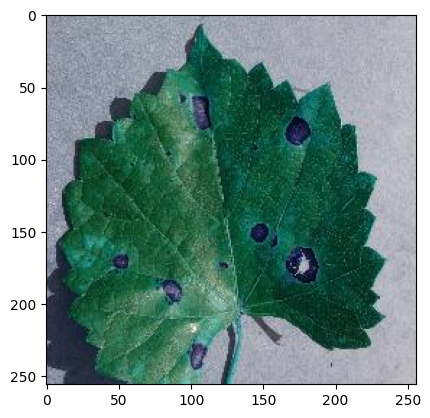

In [ ]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [ ]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [ ]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

5302
[1888, 1692, 1722]
1326
[473, 423, 430]


In [ ]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
x_train=np.array(x_train).reshape(-1,256,256,3)

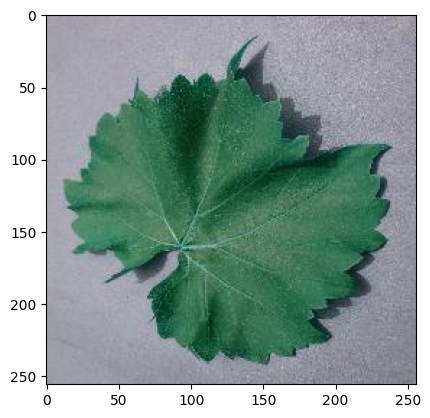

In [ ]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

In [ ]:
import cv2
import numpy as np

x_test = []
y_test = []

for features, label in testing_data:
    # Check if the image data is valid before resizing
    if features is not None and features.size != 0:
        # Resize only if the image is valid
        resized_features = cv2.resize(features, (256, 256))
        x_test.append(resized_features)
        y_test.append(label)
    else:
        # Handle invalid image data (e.g., print a warning or skip)
        print("Warning: Encountered an invalid image. Skipping...")

# Convert the list to a NumPy array after resizing valid images
x_test = np.array(x_test).reshape(-1, 256, 256, 3)

In [ ]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [ ]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [ ]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train

In [ ]:
x_train.shape

(5302, 256, 256, 3)

In [ ]:
K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          73,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,652 (404.89 KB)

 Trainable params: 103,652 (404.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_train_cat=to_categorical(y_train,4)


In [ ]:
y_test_cat=to_categorical(y_test,4)

In [ ]:
model.fit(x_train,y_train_cat,batch_size=32,
          epochs=10,verbose=1,validation_split=0.15,shuffle=True)

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 886s 6s/step - accuracy: 0.5196 - loss: 6.2740 - val_accuracy: 0.9171 - val_loss: 0.2378
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 962s 7s/step - accuracy: 0.9129 - loss: 0.2552 - val_accuracy: 0.9585 - val_loss: 0.1268
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 873s 6s/step - accuracy: 0.9470 - loss: 0.1573 - val_accuracy: 0.9523 - val_loss: 0.1109
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 929s 6s/step - accuracy: 0.9609 - loss: 0.1106 - val_accuracy: 0.8304 - val_loss: 0.5163
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 913s 6s/step - accuracy: 0.9713 - loss: 0.0859 - val_accuracy: 0.9799 - val_loss: 0.0880
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 917s 6s/step - accuracy: 0.9744 - loss: 0.0805 - val_accuracy: 0.9812 - val_loss: 0.0639
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 928s 6s/step - accuracy: 0.9760 - loss: 0.0654 - val_accuracy: 0.9812 - val_loss: 0.0765
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 948s 6s/step - accuracy: 0.9826 - loss: 0.0547 - val_accu

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)), # Adjust input shape as needed
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # Adjust number of classes as needed
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now you can save the model
model.save("leaf_disease_coloured.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
new_model=tf.keras.models.load_model("leaf_disease_coloured.h5")


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)), # Adjust input shape as needed
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Changed to 4 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Now you can save the model
model.save("leaf_disease_coloured.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
'''from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())'''

'from tensorflow.python.client import device_lib\nprint(device_lib.list_local_devices())'

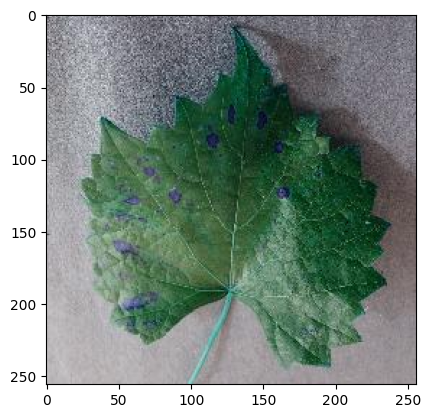

In [24]:
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt

d='/content/drive/MyDrive/data set/New folder (12)/Original Data/train/ESCA/03c1559d-52a2-455f-b682-5c3d266b05b7___FAM_B.Msls 3814.JPG'
img=cv2.imread(d)
plt.imshow(img)

In [25]:
img=img.reshape(-1,256,256,3)

In [28]:
import cv2
import numpy as np
import tensorflow as tf  # Import TensorFlow

# Load the image
d = '/content/drive/MyDrive/data set/New folder (12)/Original Data/train/Black Rot/00cff577-afd4-4e36-ac9c-a52aa6ae5949___FAM_B.Rot 0508.JPG'

# Reload the image using cv2.imread
img = cv2.imread(d)  # This line reloads the original image data

# Resize the image to the expected input shape of the model (28x28)
img = cv2.resize(img, (28, 28)) # Changed to (28, 28) to match the model's input shape

# Convert the image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale

# Reshape to add the batch dimension
img = img.reshape(1, 28, 28)  # Reshape for a single prediction, removing color channels

# Load the saved model here
new_model = tf.keras.models.load_model("leaf_disease_coloured.h5") # Make sure the path is correct

# Now predict
predict_x = new_model.predict(img)
predict_class = np.argmax(predict_x, axis=1)

print(predict_class)
predict_class
categories = ["Healthy",'Black Rot',"Leaf Blight"]
predict_class = np.argmax(predict_x, axis=1)

print(predict_class)
print(categories[predict_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[1]
[1]
Black Rot
